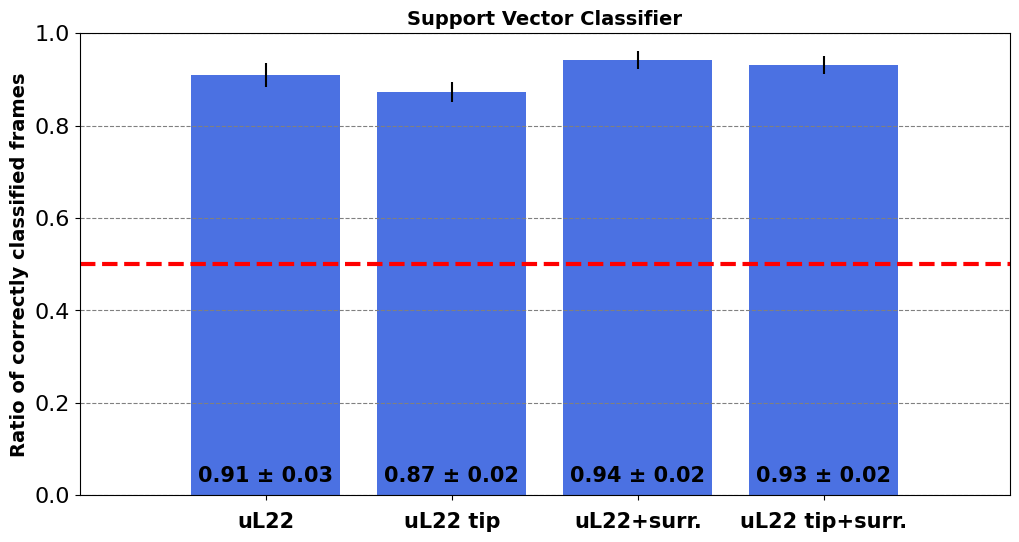

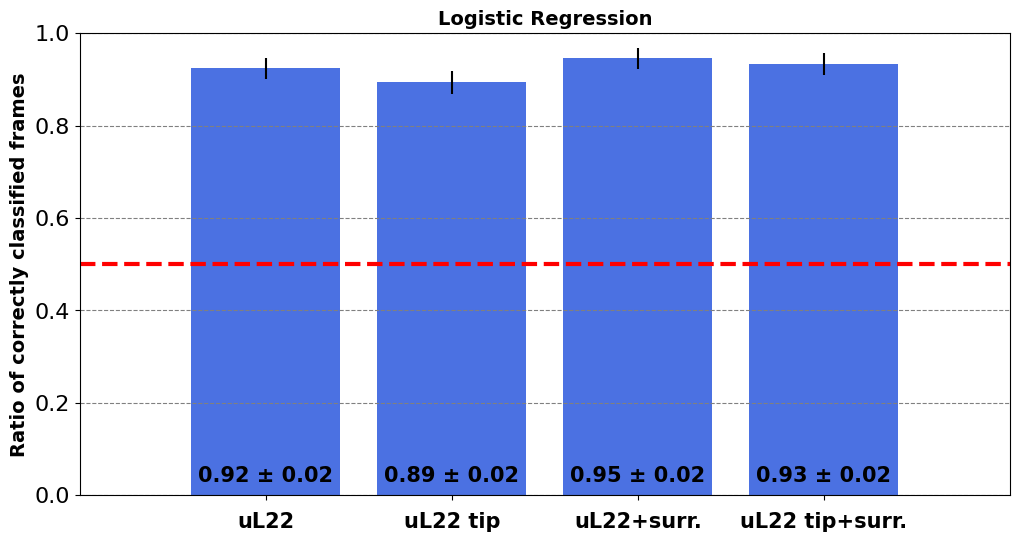

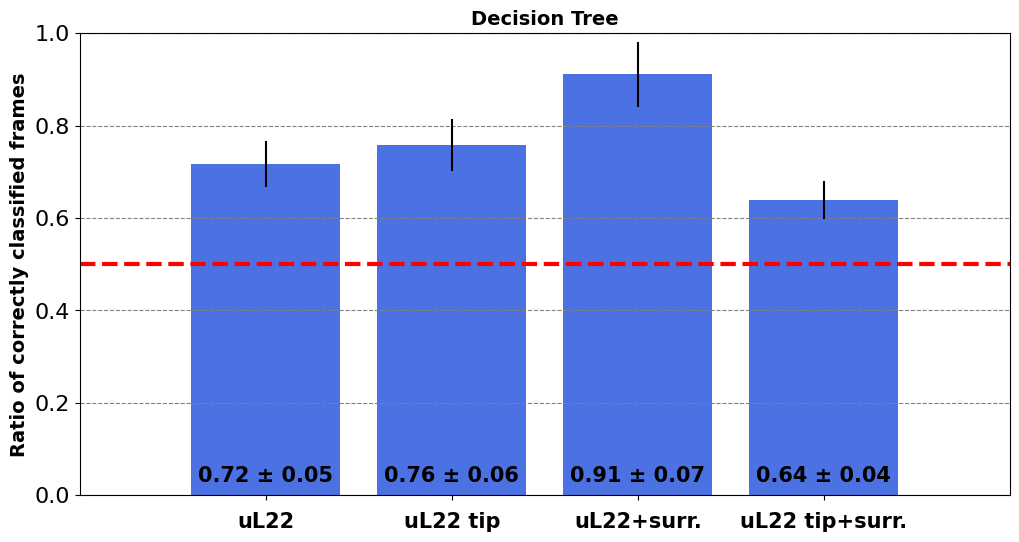

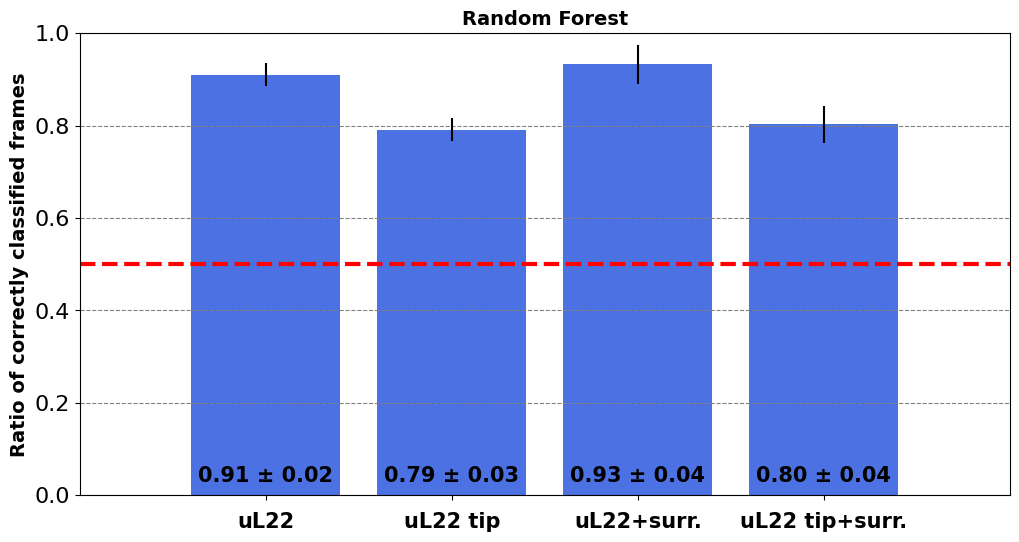

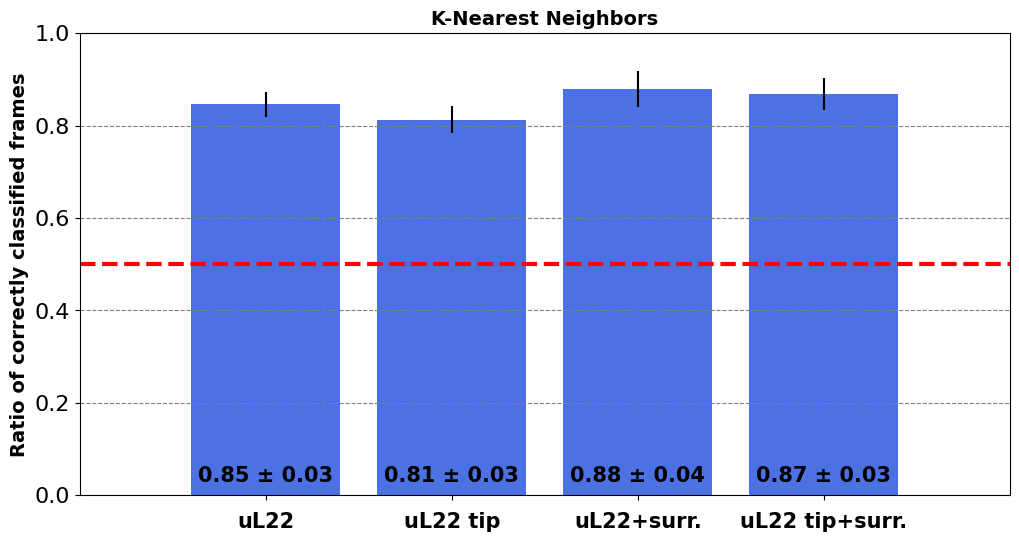

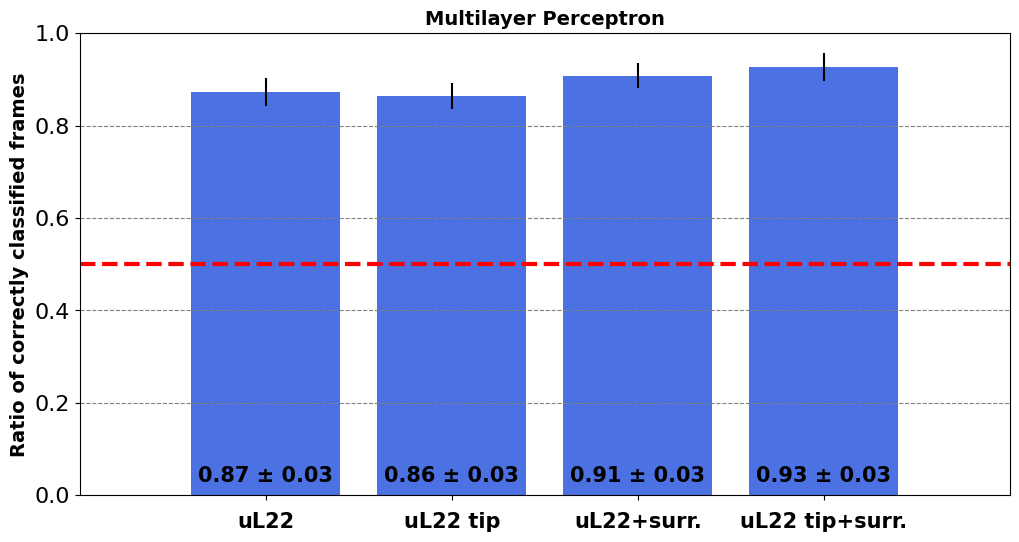

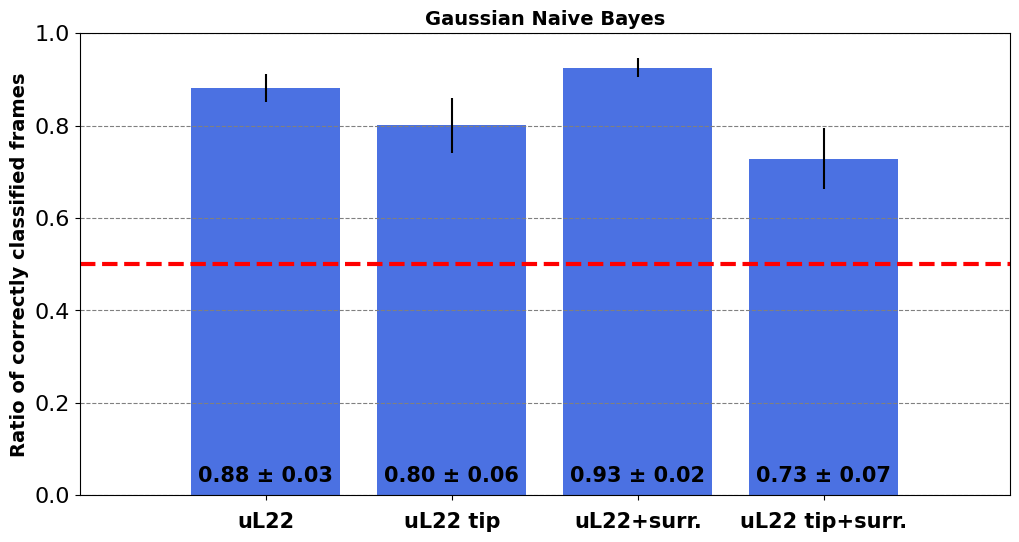

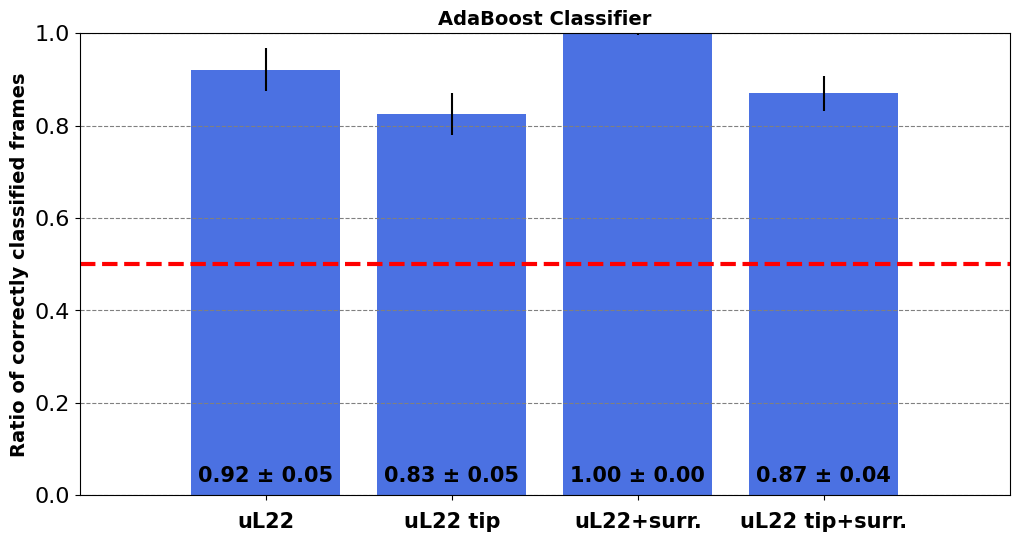

In [5]:
import numpy as np
import os
import plotting_functions as pf
import matplotlib.pyplot as plt
import shared_data as sd
from scipy.stats import sem
import utility_functions as uf


y_test = sd.y
for model in sd.PARAMS:

    model_name = sd.MODEL_NAMES_PLOTTING[model]

    percentage_correct_mean_array = np.zeros(len(sd.SELECTION_DICT))
    percentage_correct_std_array = np.zeros(len(sd.SELECTION_DICT))
    for i, selection_name in enumerate(sd.SELECTION_DICT):

        path = f"{sd.RESULTS_DIR}/y_pred_{selection_name}_{model}.npy"

        if os.path.exists(path):
            
            y_pred = np.load(path)
            # count number of times prediction matches reality
            n_correct = np.sum(y_pred == y_test, axis=1)
            percentage_correct = n_correct / y_pred.shape[1]

            percentage_correct_mean_array[i] = np.mean(percentage_correct)
            percentage_correct_std_array[i] = sem(percentage_correct, ddof=1)

    pf.correct_classification_overview(percentage_correct_mean_array, 
                                       percentage_correct_std_array, 
                                       model_name, 
                                       sd.SELECTION_NAMES_PLOTTING.values())
